In [1]:
!pip install scikit-fuzzy

    100% |████████████████████████████████| 1.0MB 21.1MB/s 
  Stored in directory: /root/.cache/pip/wheels/81/d9/eb/b8321c08339f51be3e991e7ae45b9673270cb8ca8271482ab1
Successfully built scikit-fuzzy


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
from skfuzzy.control.antecedent_consequent import Antecedent, Consequent
from skfuzzy.control import ControlSystem, ControlSystemSimulation
from skfuzzy.control.rule import Rule

In [0]:
# Step 1 : Define the factors (antecedants) influencing the system
age = np.arange(10,85, 1)
cholestrol = (np.arange(150,350, 1))
diaBP = (np.arange(50,150, 1))

riskOfMI = (np.arange(0,1,0.01))

In [0]:
# Step 2: Define the ranges of values for each category (ante and conseq) :

# Syntax : fuzz.trimf(universe of values, [triangular function])

age_young = fuzz.trimf(age, [10,10,35])
age_middle_age = fuzz.trimf(age, [35, 45, 60])
age_old = fuzz.trimf(age, [61, 61, 84])

cholestrol_normal = fuzz.trimf(cholestrol, [150,180,210])
cholestrol_high = fuzz.trimf(cholestrol, [200,230,240])
cholestrol_very_high = fuzz.trimf(cholestrol, [240,240,350])

diaBP_low = fuzz.trimf(diaBP, [50,50,60])
diaBP_normal = fuzz.trimf(diaBP, [60,80,90])
diaBP_high = fuzz.trimf(diaBP, [90,150,150])

riskOfMI_low_risk = fuzz.trimf(riskOfMI, [0,0,0.3])
riskOfMI_moderate_risk = fuzz.trimf(riskOfMI, [0.29,0.45,0.60])
riskOfMI_high_risk = fuzz.trimf(riskOfMI, [0.59,1.00,1.00])

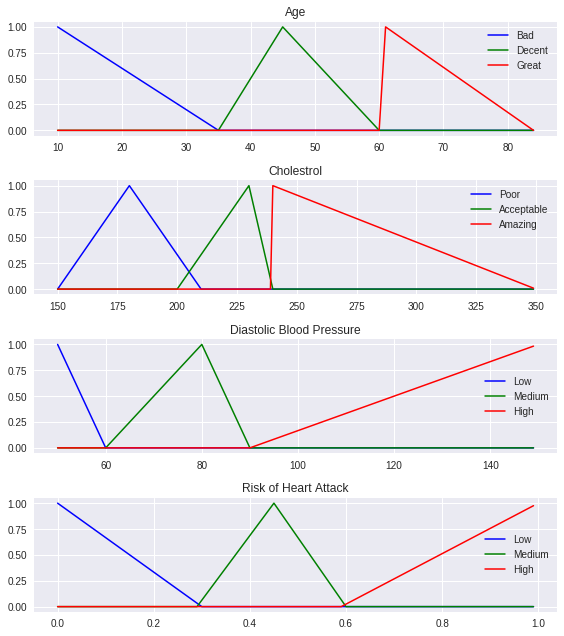

In [11]:
# Visualize the ranges for the antecedants:

# Plot code : https://pythonhosted.org/scikit-fuzzy/auto_examples/plot_defuzzify.html

fig, (ax0, ax1, ax2,ax3) = plt.subplots(nrows=4, figsize=(8, 9))

ax0.plot(age, age_young, 'b', linewidth=1.5, label='Bad')
ax0.plot(age, age_middle_age, 'g', linewidth=1.5, label='Decent')
ax0.plot(age, age_old, 'r', linewidth=1.5, label='Great')
ax0.set_title('Age')
ax0.legend()

ax1.plot(cholestrol, cholestrol_normal, 'b', linewidth=1.5, label='Poor')
ax1.plot(cholestrol, cholestrol_high, 'g', linewidth=1.5, label='Acceptable')
ax1.plot(cholestrol, cholestrol_very_high, 'r', linewidth=1.5, label='Amazing')
ax1.set_title('Cholestrol')
ax1.legend()

ax2.plot(diaBP, diaBP_low, 'b', linewidth=1.5, label='Low')
ax2.plot(diaBP, diaBP_normal, 'g', linewidth=1.5, label='Medium')
ax2.plot(diaBP, diaBP_high, 'r', linewidth=1.5, label='High')
ax2.set_title('Diastolic Blood Pressure')
ax2.legend()

ax3.plot(riskOfMI, riskOfMI_low_risk, 'b', linewidth=1.5, label='Low')
ax3.plot(riskOfMI, riskOfMI_moderate_risk, 'g', linewidth=1.5, label='Medium')
ax3.plot(riskOfMI, riskOfMI_high_risk, 'r', linewidth=1.5, label='High')
ax3.set_title('Risk of Heart Attack')
ax3.legend()

for ax in (ax0, ax1, ax2,ax3): ax.spines['top'].set_visible(False), ax.spines['right'].set_visible(False), ax.get_xaxis().tick_bottom(), ax.get_yaxis().tick_left()

plt.tight_layout()

In [32]:
# Get the values for the antecedants from the user:

in_age = (int)(input("Enter the age from 10 to 85 : "))
in_cholestrol = (int)(input("Enter the cholestrol level from 150 to 350 : "))
in_diabp = (int)(input("Enter the diastolic blood pressure from 50 to 150 : "))


Enter the age from 10 to 85 : 45
Enter the cholestrol level from 150 to 350 : 240
Enter the diastolic blood pressure from 50 to 150 : 85


In [0]:
# Find the membership values of the inputs in each categories' range:

mu_age_young = fuzz.interp_membership(age, age_young, in_age)
mu_age_mid = fuzz.interp_membership(age, age_middle_age, in_age)
mu_age_old = fuzz.interp_membership(age, age_old, in_age)

mu_chol_normal = fuzz.interp_membership(cholestrol, cholestrol_normal, in_cholestrol)
mu_chol_high = fuzz.interp_membership(cholestrol, cholestrol_high, in_cholestrol)
mu_chol_very_high = fuzz.interp_membership(cholestrol, cholestrol_very_high, in_cholestrol)

mu_bp_low = fuzz.interp_membership(diaBP, diaBP_low, in_diabp)
mu_bp_normal = fuzz.interp_membership(diaBP, diaBP_normal, in_diabp)
mu_bp_high = fuzz.interp_membership(diaBP, diaBP_high, in_diabp)

In [34]:
# Step 3 : Fire the rules:

# For low-risk patients:
# young and normal cholestorl and normal bp -> low risk
# old and normal cholestrol and low bp -> low risk

# np.fmax is or operator, np.fmin is and operator:

rule1 = np.max( [np.min([mu_age_young,mu_chol_normal,mu_bp_normal]) , 
                 np.min([mu_age_old,mu_chol_normal,mu_bp_low]) ])

low_risk = np.fmin(rule1, riskOfMI_low_risk)

# For moderate risk patients:
# young and high cholestrol and high bp -> moderate risk
# old and normal cholestrol and high bp -> moderate risk

rule2 = np.max( [np.min([mu_age_young, mu_chol_high, mu_bp_high]) , 
                 np.min([mu_age_old, mu_chol_normal, mu_bp_high]) ])

moderate_risk = np.fmin(rule2, riskOfMI_moderate_risk)

# For high risk patients:
# middle age and very high cholestrol and normal bp -> high risk
# middle age and high cholestrol and high bp -> high risk
# old and very high cholestrol and high bp -> high risk

rule3 = np.max([np.min([mu_age_mid,mu_chol_very_high,mu_bp_normal]) , 
                np.min([mu_age_mid,mu_chol_high,mu_bp_high]),
                np.min([mu_age_old,mu_chol_very_high,mu_bp_high])])

high_risk = np.fmin(rule3, riskOfMI_high_risk)

print("The person is at low risk with a chance of : ", np.max(low_risk),
    "\nThe person is at moderate risk with a chance of : ", np.max(moderate_risk),
    "\nThe person is at high risk with a chance of : ", np.max(high_risk))

The person is at low risk with a chance of :  0.0 
The person is at moderate risk with a chance of :  0.0 
The person is at high risk with a chance of :  0.5


In [35]:
# Step 4 : Defuzzification  -  Combine all the output values, to form a single activation function:

aggregated = np.fmax(low_risk, np.fmax(moderate_risk, high_risk))
(aggregated)

labels = ['centroid', 'bisector', 'mean of maximum', 'min of maximum','max of maximum']

risk = []

# Centroid : the center of area under the curve
risk.append(fuzz.defuzz(riskOfMI, aggregated, 'centroid'))

# Bisector : the vertical line that will divide the region into two sub-regions of equal area
risk.append(fuzz.defuzz(riskOfMI, aggregated, 'bisector'))

# Middle of maximum values
risk.append(fuzz.defuzz(riskOfMI, aggregated, 'mom'))

# Smallest of maximum values
risk.append(fuzz.defuzz(riskOfMI, aggregated, 'som'))

# Largest of maximum values
risk.append(fuzz.defuzz(riskOfMI, aggregated, 'lom'))


risk_activation = [fuzz.interp_membership(riskOfMI, aggregated, r) for r in risk]

for i in range(5):
  print("The defuzzified value for risk of heart disease by ",labels[i]," is = ",risk_activation[i])

The defuzzified value for risk of heart disease by  centroid  is =  0.5
The defuzzified value for risk of heart disease by  bisector  is =  0.5
The defuzzified value for risk of heart disease by  mean of maximum  is =  0.5
The defuzzified value for risk of heart disease by  min of maximum  is =  0.5
The defuzzified value for risk of heart disease by  max of maximum  is =  0.5


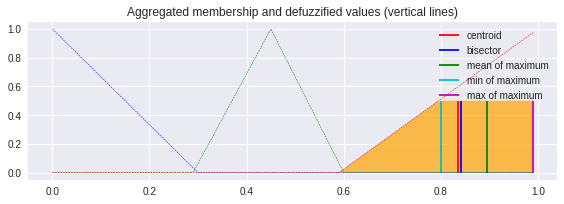

In [36]:
# Plot the graph to visulaise the defuzzified values

# Plot code : https://pythonhosted.org/scikit-fuzzy/auto_examples/plot_defuzzify.html

colors = ['r', 'b', 'g', 'c', 'm']
risk0 = np.zeros_like(riskOfMI)

fig, ax0 = plt.subplots(figsize=(8, 3))
ax0.plot(riskOfMI, riskOfMI_low_risk, 'b', linewidth=0.5, linestyle='--', )
ax0.plot(riskOfMI, riskOfMI_moderate_risk, 'g', linewidth=0.5, linestyle='--')
ax0.plot(riskOfMI, riskOfMI_high_risk, 'r', linewidth=0.5, linestyle='--')

ax0.fill_between(riskOfMI, risk0, aggregated, facecolor='Orange', alpha=0.7)

for xv, y, label, color in zip(risk, risk_activation, labels, colors):
    plt.vlines(xv, 0, y, label=label, color=color)
plt.legend(loc=1)
ax0.set_title('Aggregated membership and defuzzified values (vertical lines)')

for ax in (ax0,): ax.spines['top'].set_visible(False), ax.spines['right'].set_visible(False), ax.get_xaxis().tick_bottom(), ax.get_yaxis().tick_left()
plt.tight_layout()

**Test Case : Moderate Risk**

In [37]:
# Get the values for the antecedants from the user:

in_age = (int)(input("Enter the age from 10 to 85 : "))
in_cholestrol = (int)(input("Enter the cholestrol level from 150 to 350 : "))
in_diabp = (int)(input("Enter the diastolic blood pressure from 50 to 150 : "))


Enter the age from 10 to 85 : 23
Enter the cholestrol level from 150 to 350 : 210
Enter the diastolic blood pressure from 50 to 150 : 100


In [0]:
# Find the membership values of the inputs in each categories' range:

mu_age_young = fuzz.interp_membership(age, age_young, in_age)
mu_age_mid = fuzz.interp_membership(age, age_middle_age, in_age)
mu_age_old = fuzz.interp_membership(age, age_old, in_age)

mu_chol_normal = fuzz.interp_membership(cholestrol, cholestrol_normal, in_cholestrol)
mu_chol_high = fuzz.interp_membership(cholestrol, cholestrol_high, in_cholestrol)
mu_chol_very_high = fuzz.interp_membership(cholestrol, cholestrol_very_high, in_cholestrol)

mu_bp_low = fuzz.interp_membership(diaBP, diaBP_low, in_diabp)
mu_bp_normal = fuzz.interp_membership(diaBP, diaBP_normal, in_diabp)
mu_bp_high = fuzz.interp_membership(diaBP, diaBP_high, in_diabp)

In [39]:
# Step 3 : Fire the rules:

# For low-risk patients:
# young and normal cholestorl and normal bp -> low risk
# old and normal cholestrol and low bp -> low risk

# np.fmax is or operator, np.fmin is and operator:

rule1 = np.max( [np.min([mu_age_young,mu_chol_normal,mu_bp_normal]) , 
                 np.min([mu_age_old,mu_chol_normal,mu_bp_low]) ])

low_risk = np.fmin(rule1, riskOfMI_low_risk)

# For moderate risk patients:
# young and high cholestrol and high bp -> moderate risk
# old and normal cholestrol and high bp -> moderate risk

rule2 = np.max( [np.min([mu_age_young, mu_chol_high, mu_bp_high]) , 
                 np.min([mu_age_old, mu_chol_normal, mu_bp_high]) ])

moderate_risk = np.fmin(rule2, riskOfMI_moderate_risk)

# For high risk patients:
# middle age and very high cholestrol and normal bp -> high risk
# middle age and high cholestrol and high bp -> high risk
# old and very high cholestrol and high bp -> high risk

rule3 = np.max([np.min([mu_age_mid,mu_chol_very_high,mu_bp_normal]) , 
                np.min([mu_age_mid,mu_chol_high,mu_bp_high]),
                np.min([mu_age_old,mu_chol_very_high,mu_bp_high])])

high_risk = np.fmin(rule3, riskOfMI_high_risk)

print("The person is at low risk with a chance of : ", np.max(low_risk),
    "\nThe person is at moderate risk with a chance of : ", np.max(moderate_risk),
    "\nThe person is at high risk with a chance of : ", np.max(high_risk))

The person is at low risk with a chance of :  0.0 
The person is at moderate risk with a chance of :  0.16666666666666666 
The person is at high risk with a chance of :  0.0


In [40]:
# Step 4 : Defuzzification  -  Combine all the output values, to form a single activation function:

aggregated = np.fmax(low_risk, np.fmax(moderate_risk, high_risk))
(aggregated)

labels = ['centroid', 'bisector', 'mean of maximum', 'min of maximum','max of maximum']

risk = []

# Centroid : the center of area under the curve
risk.append(fuzz.defuzz(riskOfMI, aggregated, 'centroid'))

# Bisector : the vertical line that will divide the region into two sub-regions of equal area
risk.append(fuzz.defuzz(riskOfMI, aggregated, 'bisector'))

# Middle of maximum values
risk.append(fuzz.defuzz(riskOfMI, aggregated, 'mom'))

# Smallest of maximum values
risk.append(fuzz.defuzz(riskOfMI, aggregated, 'som'))

# Largest of maximum values
risk.append(fuzz.defuzz(riskOfMI, aggregated, 'lom'))


risk_activation = [fuzz.interp_membership(riskOfMI, aggregated, r) for r in risk]

for i in range(5):
  print("The defuzzified value for risk of heart disease by ",labels[i]," is = ",risk_activation[i])

The defuzzified value for risk of heart disease by  centroid  is =  0.16666666666666666
The defuzzified value for risk of heart disease by  bisector  is =  0.16666666666666666
The defuzzified value for risk of heart disease by  mean of maximum  is =  0.16666666666666666
The defuzzified value for risk of heart disease by  min of maximum  is =  0.16666666666666666
The defuzzified value for risk of heart disease by  max of maximum  is =  0.16666666666666666


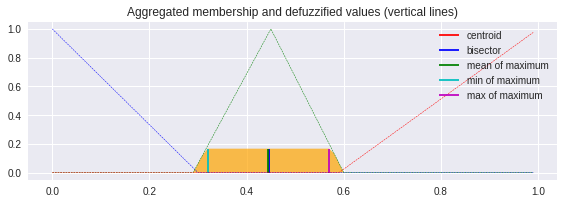

In [41]:
# Plot the graph to visulaise the defuzzified values

# Plot code : https://pythonhosted.org/scikit-fuzzy/auto_examples/plot_defuzzify.html

colors = ['r', 'b', 'g', 'c', 'm']
risk0 = np.zeros_like(riskOfMI)

fig, ax0 = plt.subplots(figsize=(8, 3))
ax0.plot(riskOfMI, riskOfMI_low_risk, 'b', linewidth=0.5, linestyle='--', )
ax0.plot(riskOfMI, riskOfMI_moderate_risk, 'g', linewidth=0.5, linestyle='--')
ax0.plot(riskOfMI, riskOfMI_high_risk, 'r', linewidth=0.5, linestyle='--')

ax0.fill_between(riskOfMI, risk0, aggregated, facecolor='Orange', alpha=0.7)

for xv, y, label, color in zip(risk, risk_activation, labels, colors):
    plt.vlines(xv, 0, y, label=label, color=color)
plt.legend(loc=1)
ax0.set_title('Aggregated membership and defuzzified values (vertical lines)')

for ax in (ax0,): ax.spines['top'].set_visible(False), ax.spines['right'].set_visible(False), ax.get_xaxis().tick_bottom(), ax.get_yaxis().tick_left()
plt.tight_layout()

**Test Case : Low risk**

In [42]:
# Get the values for the antecedants from the user:

in_age = (int)(input("Enter the age from 10 to 85 : "))
in_cholestrol = (int)(input("Enter the cholestrol level from 150 to 350 : "))
in_diabp = (int)(input("Enter the diastolic blood pressure from 50 to 150 : "))


Enter the age from 10 to 85 : 12
Enter the cholestrol level from 150 to 350 : 160
Enter the diastolic blood pressure from 50 to 150 : 80


In [0]:
# Find the membership values of the inputs in each categories' range:

mu_age_young = fuzz.interp_membership(age, age_young, in_age)
mu_age_mid = fuzz.interp_membership(age, age_middle_age, in_age)
mu_age_old = fuzz.interp_membership(age, age_old, in_age)

mu_chol_normal = fuzz.interp_membership(cholestrol, cholestrol_normal, in_cholestrol)
mu_chol_high = fuzz.interp_membership(cholestrol, cholestrol_high, in_cholestrol)
mu_chol_very_high = fuzz.interp_membership(cholestrol, cholestrol_very_high, in_cholestrol)

mu_bp_low = fuzz.interp_membership(diaBP, diaBP_low, in_diabp)
mu_bp_normal = fuzz.interp_membership(diaBP, diaBP_normal, in_diabp)
mu_bp_high = fuzz.interp_membership(diaBP, diaBP_high, in_diabp)

In [44]:
# Step 3 : Fire the rules:

# For low-risk patients:
# young and normal cholestorl and normal bp -> low risk
# old and normal cholestrol and low bp -> low risk

# np.fmax is or operator, np.fmin is and operator:

rule1 = np.max( [np.min([mu_age_young,mu_chol_normal,mu_bp_normal]) , 
                 np.min([mu_age_old,mu_chol_normal,mu_bp_low]) ])

low_risk = np.fmin(rule1, riskOfMI_low_risk)

# For moderate risk patients:
# young and high cholestrol and high bp -> moderate risk
# old and normal cholestrol and high bp -> moderate risk

rule2 = np.max( [np.min([mu_age_young, mu_chol_high, mu_bp_high]) , 
                 np.min([mu_age_old, mu_chol_normal, mu_bp_high]) ])

moderate_risk = np.fmin(rule2, riskOfMI_moderate_risk)

# For high risk patients:
# middle age and very high cholestrol and normal bp -> high risk
# middle age and high cholestrol and high bp -> high risk
# old and very high cholestrol and high bp -> high risk

rule3 = np.max([np.min([mu_age_mid,mu_chol_very_high,mu_bp_normal]) , 
                np.min([mu_age_mid,mu_chol_high,mu_bp_high]),
                np.min([mu_age_old,mu_chol_very_high,mu_bp_high])])

high_risk = np.fmin(rule3, riskOfMI_high_risk)

print("The person is at low risk with a chance of : ", np.max(low_risk),
    "\nThe person is at moderate risk with a chance of : ", np.max(moderate_risk),
    "\nThe person is at high risk with a chance of : ", np.max(high_risk))

The person is at low risk with a chance of :  0.3333333333333333 
The person is at moderate risk with a chance of :  0.0 
The person is at high risk with a chance of :  0.0


In [45]:
# Step 4 : Defuzzification  -  Combine all the output values, to form a single activation function:

aggregated = np.fmax(low_risk, np.fmax(moderate_risk, high_risk))
(aggregated)

labels = ['centroid', 'bisector', 'mean of maximum', 'min of maximum','max of maximum']

risk = []

# Centroid : the center of area under the curve
risk.append(fuzz.defuzz(riskOfMI, aggregated, 'centroid'))

# Bisector : the vertical line that will divide the region into two sub-regions of equal area
risk.append(fuzz.defuzz(riskOfMI, aggregated, 'bisector'))

# Middle of maximum values
risk.append(fuzz.defuzz(riskOfMI, aggregated, 'mom'))

# Smallest of maximum values
risk.append(fuzz.defuzz(riskOfMI, aggregated, 'som'))

# Largest of maximum values
risk.append(fuzz.defuzz(riskOfMI, aggregated, 'lom'))


risk_activation = [fuzz.interp_membership(riskOfMI, aggregated, r) for r in risk]

for i in range(5):
  print("The defuzzified value for risk of heart disease by ",labels[i]," is = ",risk_activation[i])

The defuzzified value for risk of heart disease by  centroid  is =  0.3333333333333333
The defuzzified value for risk of heart disease by  bisector  is =  0.3333333333333333
The defuzzified value for risk of heart disease by  mean of maximum  is =  0.3333333333333333
The defuzzified value for risk of heart disease by  min of maximum  is =  0.3333333333333333
The defuzzified value for risk of heart disease by  max of maximum  is =  0.3333333333333333


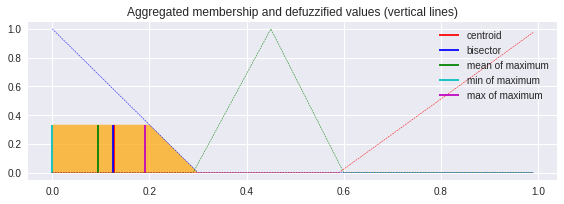

In [46]:
# Plot the graph to visulaise the defuzzified values

# Plot code : https://pythonhosted.org/scikit-fuzzy/auto_examples/plot_defuzzify.html

colors = ['r', 'b', 'g', 'c', 'm']
risk0 = np.zeros_like(riskOfMI)

fig, ax0 = plt.subplots(figsize=(8, 3))
ax0.plot(riskOfMI, riskOfMI_low_risk, 'b', linewidth=0.5, linestyle='--', )
ax0.plot(riskOfMI, riskOfMI_moderate_risk, 'g', linewidth=0.5, linestyle='--')
ax0.plot(riskOfMI, riskOfMI_high_risk, 'r', linewidth=0.5, linestyle='--')

ax0.fill_between(riskOfMI, risk0, aggregated, facecolor='Orange', alpha=0.7)

for xv, y, label, color in zip(risk, risk_activation, labels, colors):
    plt.vlines(xv, 0, y, label=label, color=color)
plt.legend(loc=1)
ax0.set_title('Aggregated membership and defuzzified values (vertical lines)')

for ax in (ax0,): ax.spines['top'].set_visible(False), ax.spines['right'].set_visible(False), ax.get_xaxis().tick_bottom(), ax.get_yaxis().tick_left()
plt.tight_layout()